In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
nba = pd.read_csv('nba_2013.csv')

In [4]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [9]:
nba.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

In [13]:
nba.shape

(481, 31)

In [11]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
player          481 non-null object
pos             481 non-null object
age             481 non-null int64
bref_team_id    481 non-null object
g               481 non-null int64
gs              481 non-null int64
mp              481 non-null int64
fg              481 non-null int64
fga             481 non-null int64
fg.             479 non-null float64
x3p             481 non-null int64
x3pa            481 non-null int64
x3p.            414 non-null float64
x2p             481 non-null int64
x2pa            481 non-null int64
x2p.            478 non-null float64
efg.            479 non-null float64
ft              481 non-null int64
fta             481 non-null int64
ft.             461 non-null float64
orb             481 non-null int64
drb             481 non-null int64
trb             481 non-null int64
ast             481 non-null int64
stl             481 non-null int64
blk    

In [12]:
nba.isna().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [5]:
dmp = pd.get_dummies(nba.pos, drop_first=True)

In [6]:
ip = [nba, dmp]

In [14]:
lp = pd.concat(ip, axis=1)
#lp

In [15]:
lp.shape

(481, 37)

In [18]:
nba.corr()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
age,1.000000,0.003149,0.031170,0.019843,-0.004368,-0.014302,0.040057,0.062686,0.038126,0.034957,...,-0.068620,0.023577,-0.004398,0.026157,-0.022535,0.001864,-0.028296,-0.016736,-0.007520,NaN
g,0.003149,1.000000,0.589389,0.855091,0.719623,0.729451,0.429928,0.498908,0.517138,0.134474,...,0.511668,0.681047,0.654439,0.520201,0.682955,0.444877,0.678705,0.844418,0.708630,NaN
gs,0.031170,0.589389,1.000000,0.852544,0.807803,0.799696,0.336935,0.475804,0.489954,0.072941,...,0.534162,0.755443,0.715461,0.614157,0.721275,0.490469,0.744199,0.703682,0.797006,NaN
mp,0.019843,0.855091,0.852544,1.000000,0.923122,0.931583,0.393050,0.620925,0.642271,0.158417,...,0.552034,0.805803,0.757597,0.711095,0.829725,0.489242,0.867292,0.869167,0.920194,NaN
fg,-0.004368,0.719623,0.807803,0.923122,1.000000,0.987777,0.407535,0.562590,0.578946,0.124877,...,0.548940,0.819745,0.766743,0.679671,0.756097,0.484449,0.890360,0.781590,0.991289,NaN
fga,-0.014302,0.729451,0.799696,0.931583,0.987777,1.000000,0.325958,0.628079,0.652180,0.170132,...,0.476147,0.772900,0.709946,0.719715,0.773317,0.416612,0.898432,0.772608,0.988128,NaN
fg.,0.040057,0.429928,0.336935,0.393050,0.407535,0.325958,1.000000,0.007605,-0.013174,-0.091448,...,0.531054,0.497099,0.527060,0.128746,0.282662,0.484121,0.322147,0.472329,0.370077,NaN
x3p,0.062686,0.498908,0.475804,0.620925,0.562590,0.628079,0.007605,1.000000,0.990855,0.494052,...,-0.100796,0.246765,0.147440,0.572132,0.547052,-0.065418,0.517260,0.419992,0.624143,NaN
x3pa,0.038126,0.517138,0.489954,0.642271,0.578946,0.652180,-0.013174,0.990855,1.000000,0.482355,...,-0.093893,0.257608,0.157470,0.598351,0.579049,-0.063485,0.547655,0.436648,0.640738,NaN
x3p.,0.034957,0.134474,0.072941,0.158417,0.124877,0.170132,-0.091448,0.494052,0.482355,1.000000,...,-0.328429,-0.094532,-0.171503,0.231770,0.167502,-0.193395,0.112055,-0.010621,0.160854,NaN


In [19]:
cols = ['x2p','x2pa','x2p.','efg.','ft','fta','ft.','pts']

In [20]:
dt = nba[cols]

In [21]:
dt.corr()

,x2p,x2pa,x2p.,efg.,ft,fta,ft.,pts
x2p,1.000000,0.990522,0.333754,0.296193,0.862592,0.886748,0.144184,0.925905
x2pa,0.990522,1.000000,0.270459,0.246272,0.867119,0.884139,0.167459,0.929844
x2p.,0.333754,0.270459,1.000000,0.767033,0.238607,0.267232,0.075466,0.286571
efg.,0.296193,0.246272,0.767033,1.000000,0.234563,0.247925,0.238933,0.345044
ft,0.862592,0.867119,0.238607,0.234563,1.000000,0.987299,0.234965,0.923201
fta,0.886748,0.884139,0.267232,0.247925,0.987299,1.000000,0.164444,0.915259
ft.,0.144184,0.167459,0.075466,0.238933,0.234965,0.164444,1.000000,0.258744
pts,0.925905,0.929844,0.286571,0.345044,0.923201,0.915259,0.258744,1.000000


In [26]:
lp.dropna(axis=0, inplace=True)

In [27]:
lp.isna().sum(axis=0)

player          0
pos             0
age             0
bref_team_id    0
g               0
gs              0
mp              0
fg              0
fga             0
fg.             0
x3p             0
x3pa            0
x3p.            0
x2p             0
x2pa            0
x2p.            0
efg.            0
ft              0
fta             0
ft.             0
orb             0
drb             0
trb             0
ast             0
stl             0
blk             0
tov             0
pf              0
pts             0
season          0
season_end      0
F               0
G               0
PF              0
PG              0
SF              0
SG              0
dtype: int64

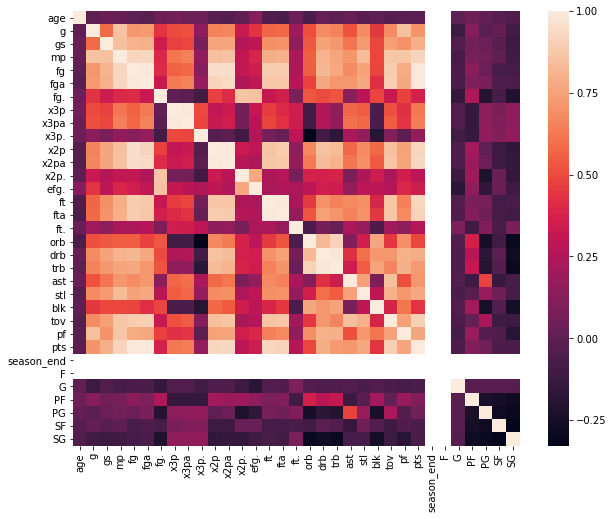

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(lp.corr())

In [45]:
lp['season'] = lp.season.map({'2013-2014':1})

In [47]:
#lp.season

In [29]:
dmp.columns

Index(['F', 'G', 'PF', 'PG', 'SF', 'SG'], dtype='object')

In [48]:
X_col = ['age','g','gs','mp','fg','fga','x3p','x3pa','orb','drb','trb','ast','stl','blk','tov','pf','x2p','x2pa','ft','fta','ft.','F', 'season', 'G', 'PF', 'PG', 'SF', 'SG']

In [49]:
X = lp[X_col]

In [34]:
y = nba['pts']

In [50]:
lp.shape

(403, 37)

In [51]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403 entries, 0 to 480
Data columns (total 28 columns):
age       403 non-null int64
g         403 non-null int64
gs        403 non-null int64
mp        403 non-null int64
fg        403 non-null int64
fga       403 non-null int64
x3p       403 non-null int64
x3pa      403 non-null int64
orb       403 non-null int64
drb       403 non-null int64
trb       403 non-null int64
ast       403 non-null int64
stl       403 non-null int64
blk       403 non-null int64
tov       403 non-null int64
pf        403 non-null int64
x2p       403 non-null int64
x2pa      403 non-null int64
ft        403 non-null int64
fta       403 non-null int64
ft.       403 non-null float64
F         403 non-null uint8
season    403 non-null int64
G         403 non-null uint8
PF        403 non-null uint8
PG        403 non-null uint8
SF        403 non-null uint8
SG        403 non-null uint8
dtypes: float64(1), int64(21), uint8(6)
memory usage: 74.8 KB


In [35]:
X.shape

(403, 27)

In [36]:
y.shape

(403,)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 100)

In [53]:
X_train.shape

(282, 28)

In [54]:
y_train.shape

(282,)

In [105]:
#help(KNeighborsRegressor)
#from sklearn.linear_model import LinearRegression

## Model implementation

In [55]:
for k_val in range(25):
    k_val+=1
    kn = KNeighborsRegressor(n_neighbors = k_val, weights='uniform', algorithm='auto')
    kn.fit(X_train, y_train)
    y_pred = kn.predict(X_test)
    print("Accuracy is ", accuracy_score(y_test,y_pred.astype(int))*100,"% for K-Value:",k_val)

Accuracy is  3.3057851239669422 % for K-Value: 1
Accuracy is  0.0 % for K-Value: 2
Accuracy is  2.479338842975207 % for K-Value: 3
Accuracy is  0.0 % for K-Value: 4
Accuracy is  2.479338842975207 % for K-Value: 5
Accuracy is  0.0 % for K-Value: 6
Accuracy is  0.0 % for K-Value: 7
Accuracy is  0.8264462809917356 % for K-Value: 8
Accuracy is  2.479338842975207 % for K-Value: 9
Accuracy is  0.0 % for K-Value: 10
Accuracy is  0.0 % for K-Value: 11
Accuracy is  0.8264462809917356 % for K-Value: 12
Accuracy is  0.8264462809917356 % for K-Value: 13
Accuracy is  1.6528925619834711 % for K-Value: 14
Accuracy is  2.479338842975207 % for K-Value: 15
Accuracy is  0.8264462809917356 % for K-Value: 16
Accuracy is  2.479338842975207 % for K-Value: 17
Accuracy is  2.479338842975207 % for K-Value: 18
Accuracy is  1.6528925619834711 % for K-Value: 19
Accuracy is  0.8264462809917356 % for K-Value: 20
Accuracy is  0.0 % for K-Value: 21
Accuracy is  0.0 % for K-Value: 22
Accuracy is  0.8264462809917356 % f